<a href="https://colab.research.google.com/github/mukuakhilesh/SHALA2020/blob/master/DS_L3_20_April_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 3: Improving Graphs**

---
Course website: [SHALA-2020](https://shala2020.github.io/)

This assignment will get you familiarized with improving plots/graphs in Python. 

---
## Part 1 - Importing packages and loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

*You are free to use any other popular libraries*. 

In [1]:
# Load the libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```train``` and ```movies``` respectively. 
* Print the first ten rows of ```train``` and last ten rows of ```movies```. 

In [2]:
# Load train.csv and movies.csv 
url_train = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
train = pd.read_csv(url_train)

# Print the first ten rows of train
train.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


In [3]:
# Load movies.csv
url_movies = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/DataScience/L2/moviesData.csv"
movies = pd.read_csv(url_movies)

# Print the last ten rows of movies 
movies.tail(10)

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
590,591,Funny Lady,Feature Film,Drama,136.0,PG,Columbia Pictures,1975,3,7,2002.0,2.0,5.0,6.4,3584,Rotten,38,Spilled,55,no,no,no,yes,no,no,Herbert Ross,Barbra Streisand,James Caan,Omar Sharif,Roddy McDowall,Ben Vereen
591,592,Capote,Feature Film,Drama,114.0,R,Sony Pictures Classics,2005,9,30,2006.0,3.0,14.0,7.4,96787,Certified Fresh,90,Upright,81,yes,no,yes,no,no,no,Bennett Miller,Philip Seymour Hoffman,Catherine Keener,Chris Cooper,Bruce Greenwood,Bob Balaban
592,593,Dead Men Don't Wear Plaid,Feature Film,Mystery & Suspense,88.0,PG,Universal Pictures,1982,5,21,1999.0,3.0,16.0,6.8,16366,Fresh,77,Upright,73,no,no,no,no,no,no,Carl Reiner,Steve Martin,Rachel Ward,Reni Santoni,Carl Reiner,George Gaynes
593,594,Tarzan,Feature Film,Drama,88.0,G,Buena Vista Pictures,1999,6,16,2000.0,1.0,1.0,7.2,134270,Certified Fresh,88,Upright,74,no,no,no,no,no,no,Chris Buck,Tony Goldwyn,Glenn Close,Minnie Driver,Rosie O'Donnell,Lance Henriksen
594,595,Cocoon: The Return,Feature Film,Drama,116.0,PG,Fox,1988,11,23,2004.0,6.0,1.0,5.2,11657,Rotten,36,Spilled,35,no,no,no,no,no,no,Daniel Petrie,Don Ameche,Wilford Brimley,Hume Cronyn,Jack Gilford,Steve Guttenberg
595,596,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey
596,597,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True
597,598,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell
598,599,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice
599,600,LOL,Feature Film,Comedy,97.0,PG-13,Lionsgate Films,2012,5,4,2012.0,7.0,31.0,4.2,43574,Rotten,17,Spilled,51,no,no,no,no,no,no,Liza Azuelos,Miley Cyrus,Demi Moore,Ashley Greene,Douglas Booth,Adam G. Sevani


---
## Part 2 - Drawing correlation and heatmap 
---

### Using the correlation matrix, peform the following:

* Find the correlation matrix for the ```movies```.  
* Draw a **heatmap** with the correlation matrix and display the values of correlation coefficients for each pair of features. Make sure the values are properly visible. You might want to adjust the figure size for this. 
* Create a ```mask``` to remove the duplicate values from the **heatmap**. 

In [24]:
# Find out the correlation matrix 
corr = train.corr()
corr


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
Age,1.000000,-0.168641,0.010270,-0.022883,0.181464,NaN,0.003173,0.033375,0.006313,0.042037,0.512325,-0.021383,0.503340,0.016969,0.313343,-0.025688,-0.037771,0.061905,0.006998,0.691968,-0.002472,-0.028193,0.317744,0.209906,0.215766,0.194178,0.002749
Attrition,-0.168641,1.000000,-0.050566,0.086875,-0.041021,NaN,0.026833,-0.119202,-0.018472,-0.158768,-0.169121,-0.097518,-0.163709,0.025739,0.037174,0.008138,0.005300,-0.050263,-0.160597,-0.178842,-0.038728,-0.064322,-0.133021,-0.159691,-0.031826,-0.151208,0.026794
DailyRate,0.010270,-0.050566,1.000000,0.023364,-0.049667,NaN,-0.072425,0.018301,0.025172,0.057859,0.009149,0.032010,0.015948,-0.042087,0.026531,0.031686,0.024503,-0.023635,0.042857,0.028833,0.004617,-0.066313,-0.042520,0.005374,-0.041213,-0.037282,-0.072765
DistanceFromHome,-0.022883,0.086875,0.023364,1.000000,0.012416,NaN,0.008191,-0.022668,0.056265,0.058609,-0.030509,0.002253,-0.048151,0.026314,-0.021968,0.041837,0.034268,0.005861,0.043912,-0.025257,-0.007631,-0.053905,-0.029847,-0.004379,-0.008735,-0.004795,0.008636
Education,0.181464,-0.041021,-0.049667,0.012416,1.000000,NaN,-0.002240,0.006558,0.022398,0.028283,0.098366,0.003848,0.098867,-0.049857,0.133409,-0.018768,-0.039675,0.014048,-0.003790,0.133525,-0.036168,0.011091,0.061348,0.075898,0.072333,0.086565,-0.001705
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.003173,0.026833,-0.072425,0.008191,-0.002240,NaN,1.000000,0.029648,0.024285,-0.003322,0.031621,-0.043556,0.041926,0.010285,0.003580,-0.056774,-0.057206,-0.093246,0.024540,0.018827,-0.007704,0.028360,0.012112,0.000836,0.005375,-0.010186,0.999796
EnvironmentSatisfaction,0.033375,-0.119202,0.018301,-0.022668,0.006558,NaN,0.029648,1.000000,-0.066821,0.014838,0.014005,0.017982,-0.000771,0.019339,0.000308,-0.063798,-0.044733,-0.011526,0.020861,0.008940,-0.036634,0.018968,0.000121,0.025088,0.023509,-0.003313,0.028744
HourlyRate,0.006313,-0.018472,0.025172,0.056265,0.022398,NaN,0.024285,-0.066821,1.000000,0.045250,-0.013305,-0.072199,-0.004524,-0.026535,0.023740,-0.007174,-0.009990,-0.016492,0.020385,-0.010346,-0.014123,0.002916,-0.018412,-0.033051,-0.042768,-0.030232,0.022999
JobInvolvement,0.042037,-0.158768,0.057859,0.058609,0.028283,NaN,-0.003322,0.014838,0.045250,1.000000,-0.007549,-0.037395,-0.006137,-0.011343,0.010136,-0.022957,-0.014805,0.061255,0.043739,-0.005842,-0.030435,-0.022140,-0.009283,0.011350,-0.021055,0.038344,-0.003512


(26, 26)


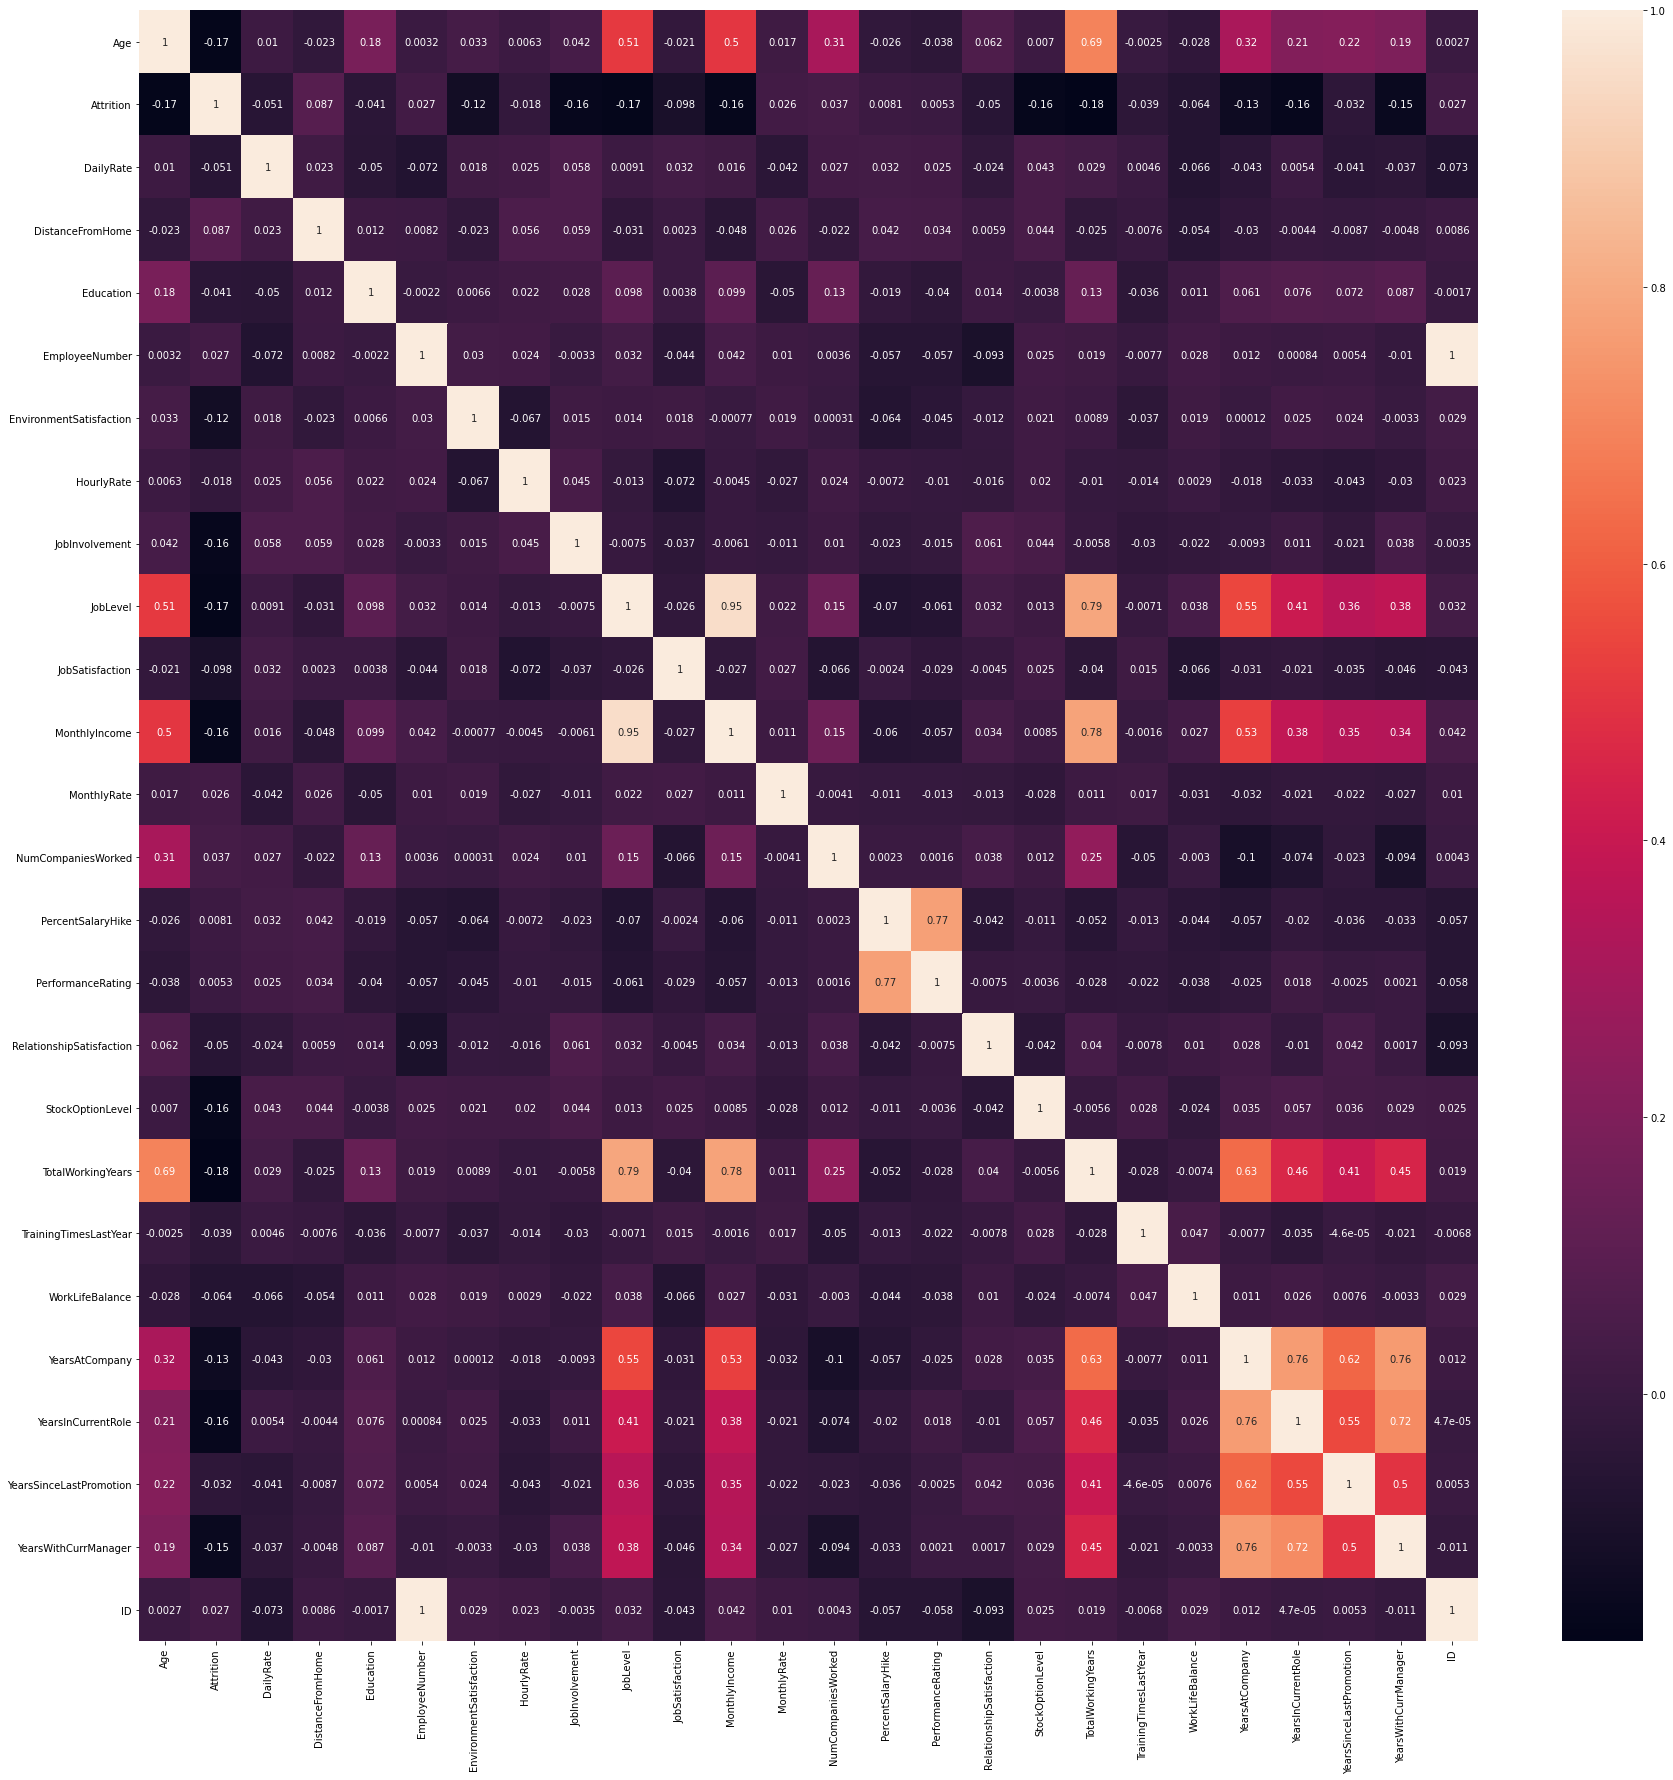

In [32]:
# Draw the heatmap
corr_nw = corr.drop(columns='EmployeeCount',index='EmployeeCount')
plt.figure(figsize=(30,30)) 
hmp = sns.heatmap(corr_nw,annot=True)
print(corr_nw.shape)

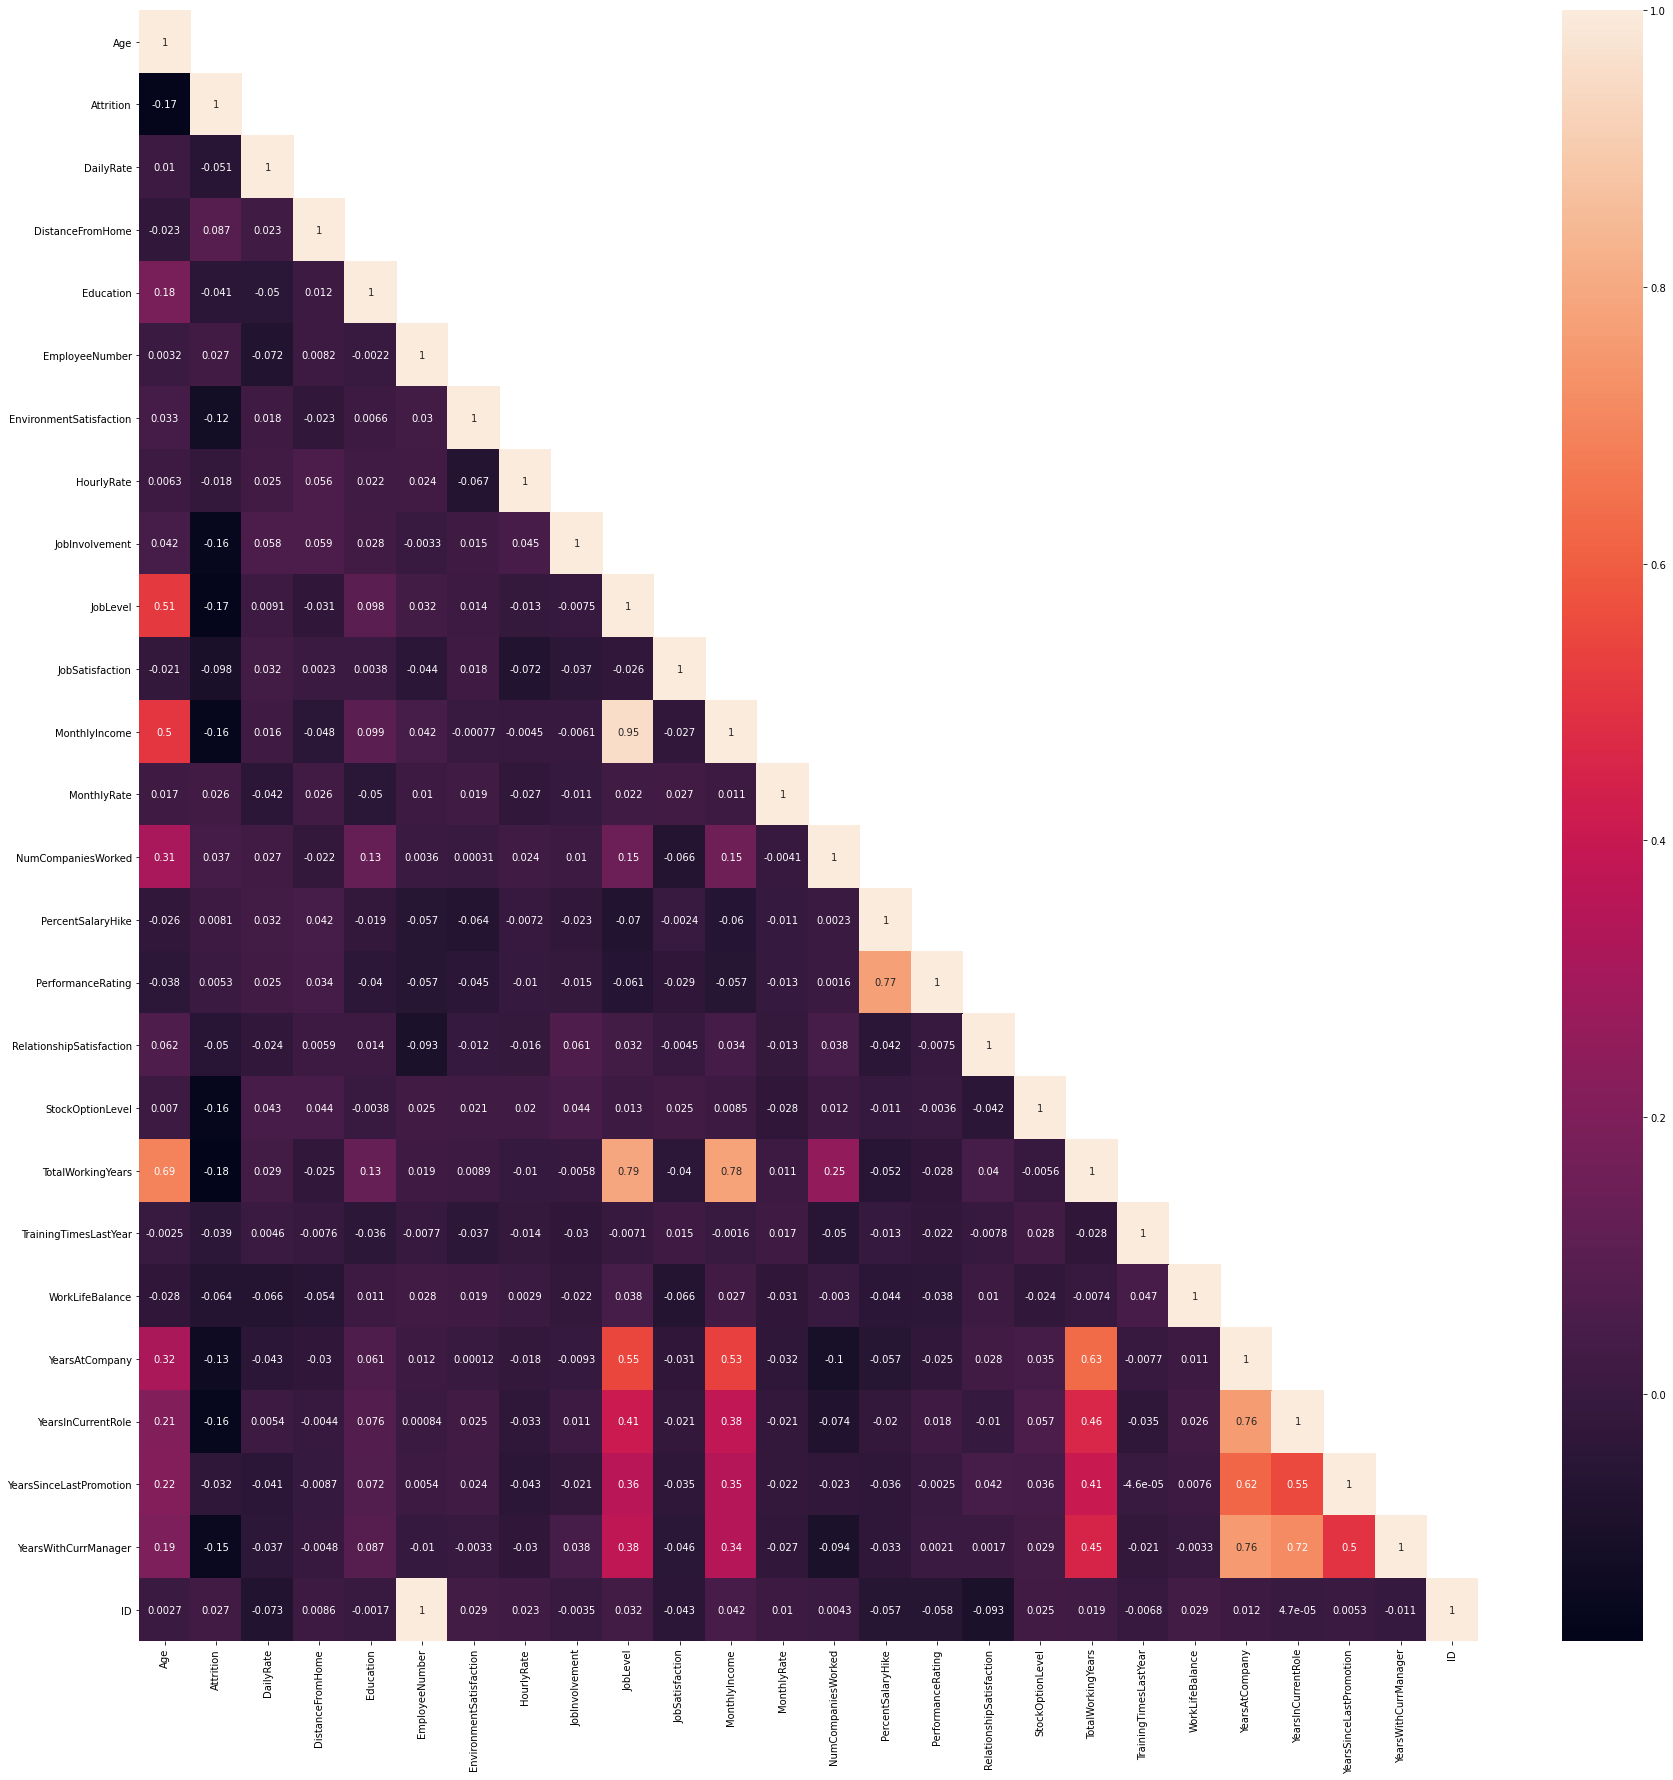

In [61]:
# Creating a mask for removing duplicates 
mask = np.ones(corr_nw.shape,dtype='bool')
mask[np.tril_indices(len(mask))] = False

plt.figure(figsize=(30,30)) 
sns.heatmap(corr_nw,annot=True,mask=mask)
# print(mask)

---
## Part 3 - Drawing plots and customizing these 
---

### Using a histogram, peform the following:

* Draw a histogram of all the numeric features in ```train```. Please note that this can be done in a single command.  

* Find out whether there is any redundant features in ```train```, which can be dropped while building a model. 

<Figure size 2160x2160 with 0 Axes>

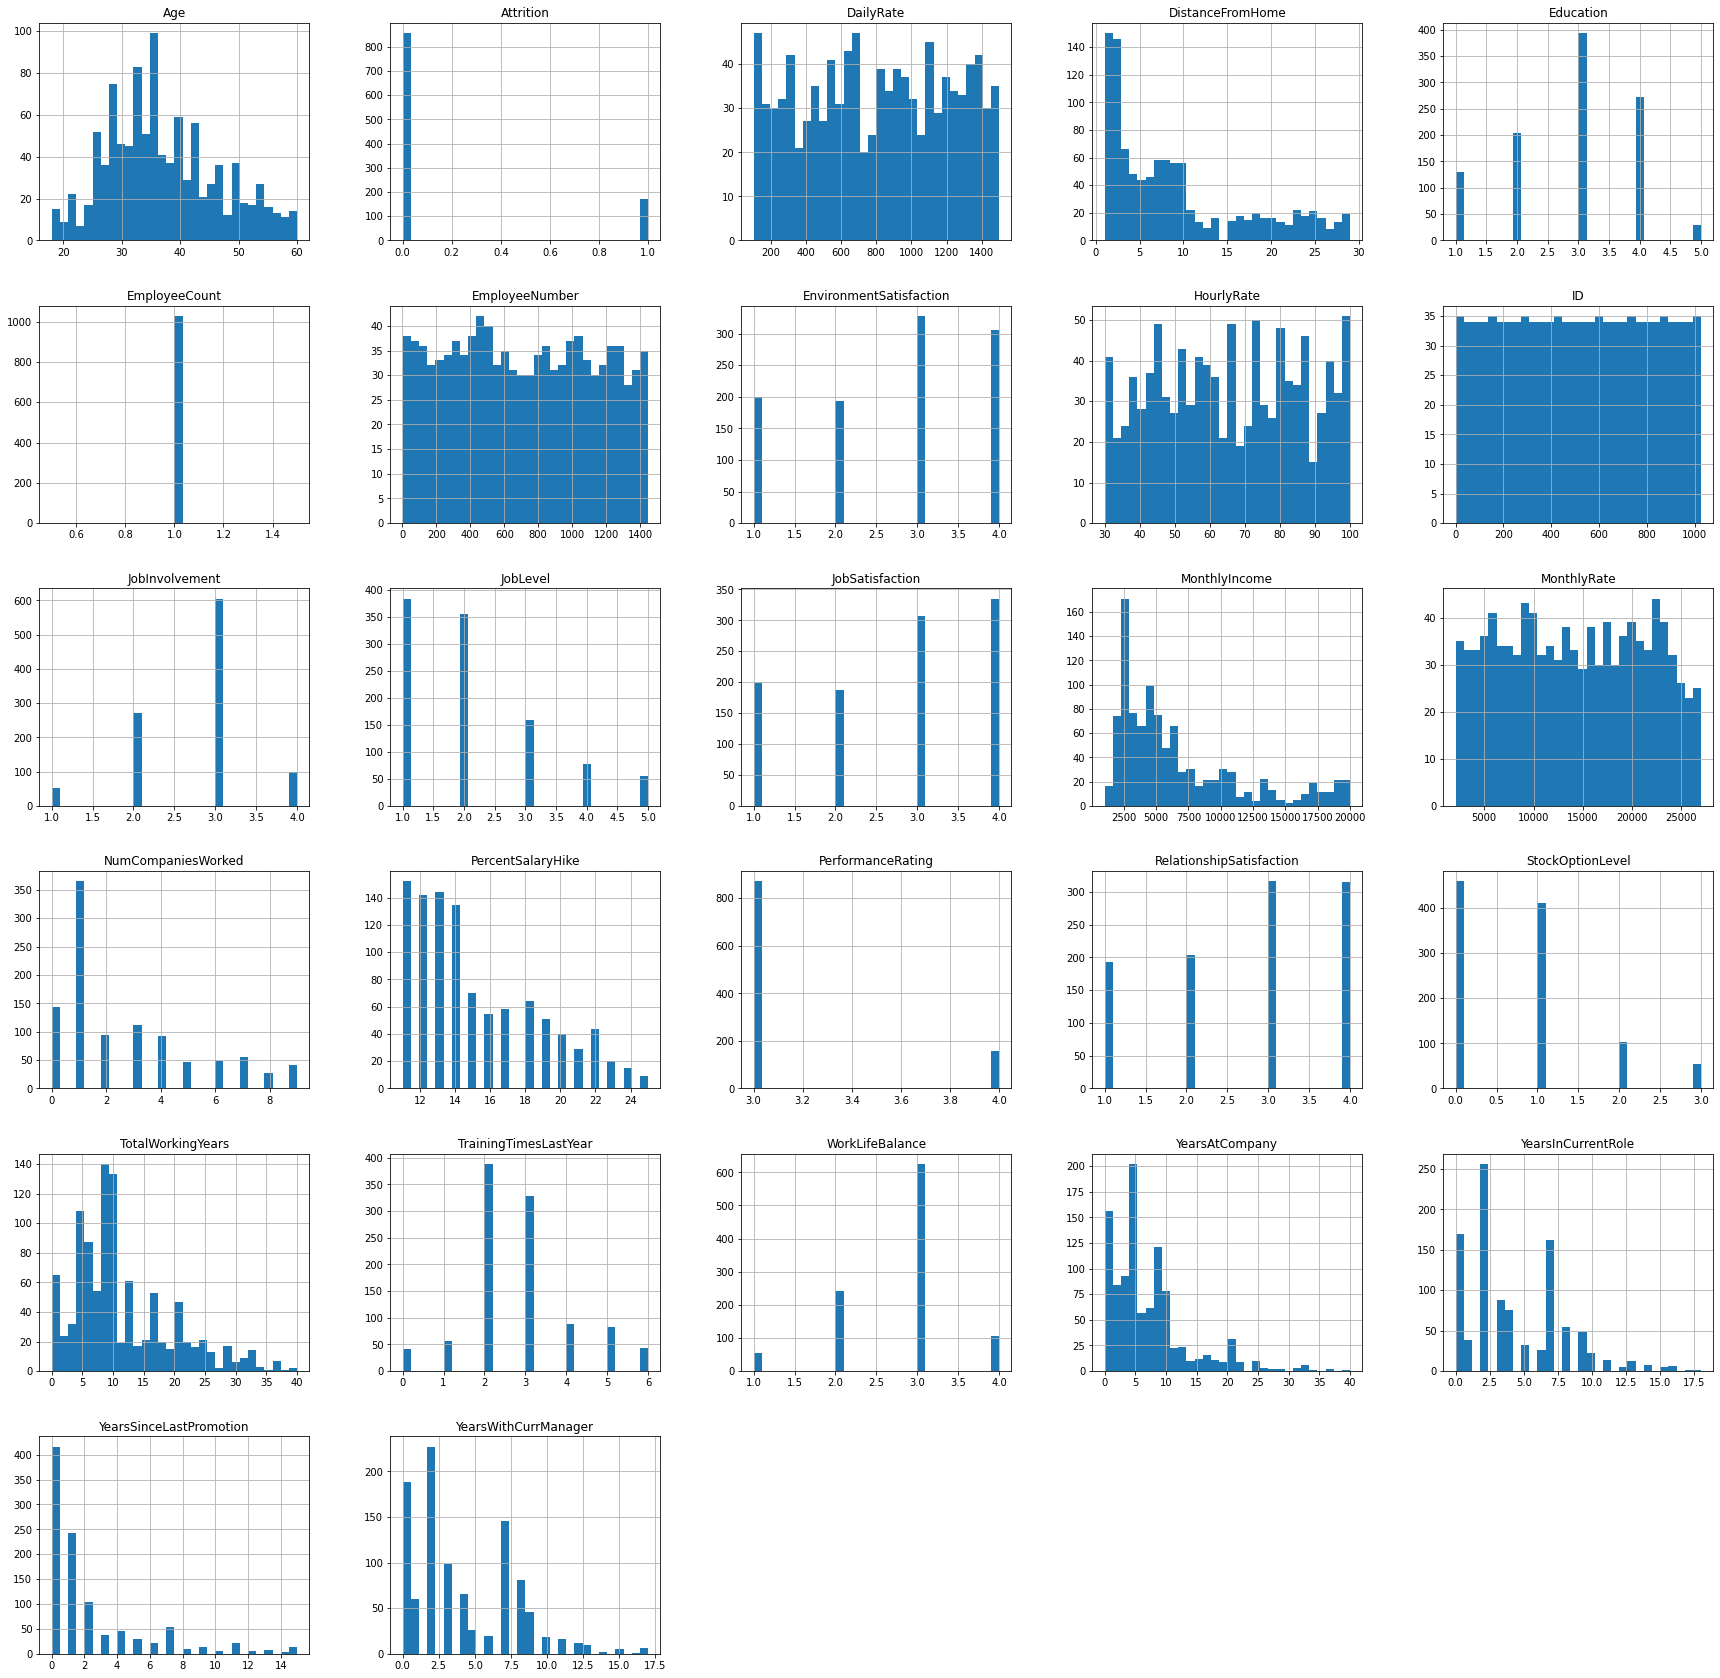

In [4]:
# Draw a histogram 
plt.figure(figsize=(30,30))
train.select_dtypes(include=['int64']).hist(bins=30,figsize=(30,30))
plt.show()


In [40]:
# Find out the redundant features
print('Redundant Features: \nEmployeeCount \nID')

Redundant Features: 
EmployeeCount 
ID


### Using a scatter plot, perform the following:

* Draw a scatter plot between between ```imdb_rating``` and ```audience_score```, and also fit a regression line.
* Change the color of marker to red, size to 200, transparency to 0.3.    



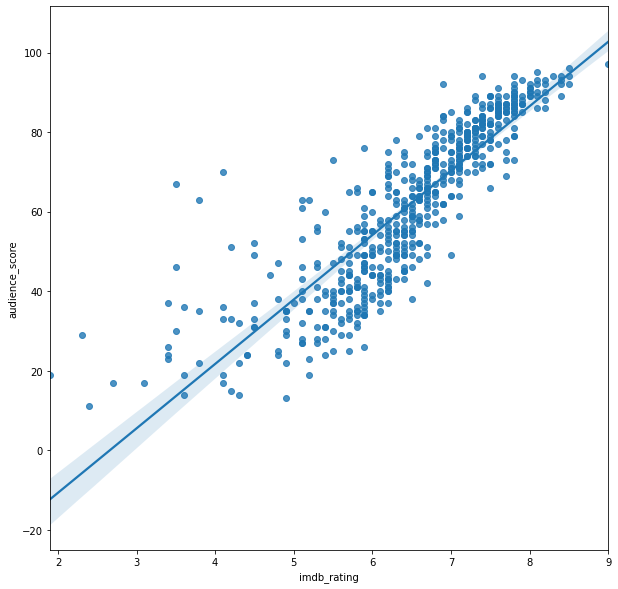

In [41]:
# Scatter plot to fit the regression line
plt.figure(figsize=(10,10))
sns.regplot(x=movies.imdb_rating,y=movies.audience_score)

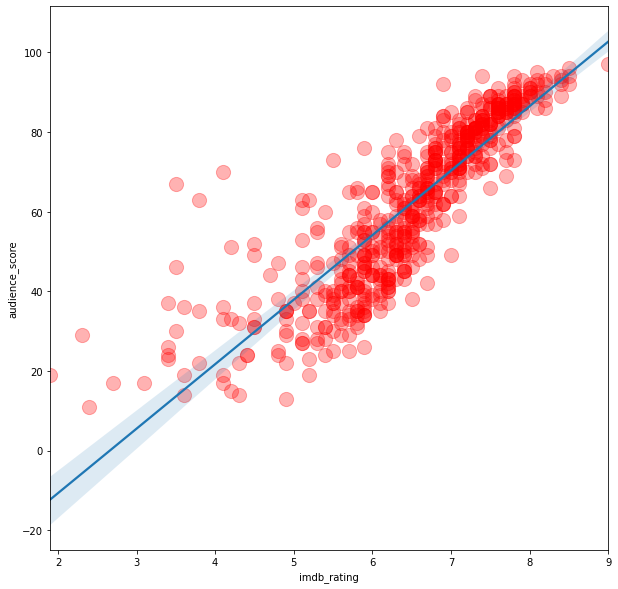

In [6]:
# Change marker of the scatter plot
plt.figure(figsize=(10,10))
sns.regplot(x=movies.imdb_rating,y=movies.audience_score,ci=97,scatter_kws={"color":"red", "alpha":0.3, "s":200})

### Using a scatter plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw a scatter plot between between ```petal_length``` and ```petal_width``` and color it according to the ```species```.
* Change the size of marker to 100 and place the legend in ```lower right```. 

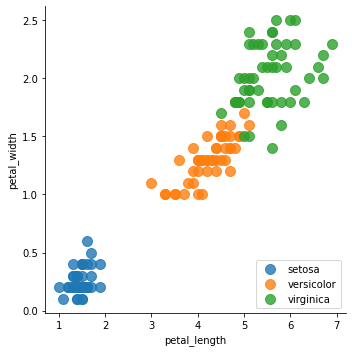

In [42]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot(data=df,x='petal_length',y='petal_width',hue='species',fit_reg=False,scatter_kws={'s':100},legend_out=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

---
## Part 4 - Density Plots  
---

### Using density plots, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots for all the features ```sepal_width```, ```sepal_length```, ```petal_width```, and ```petal_length```. You can required to use subplots for plotting all the density plots. 
* Try drawing a [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of these features. There is a [blog on medium](https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6) on how to plot CDF. It will be covered in tutorial. 

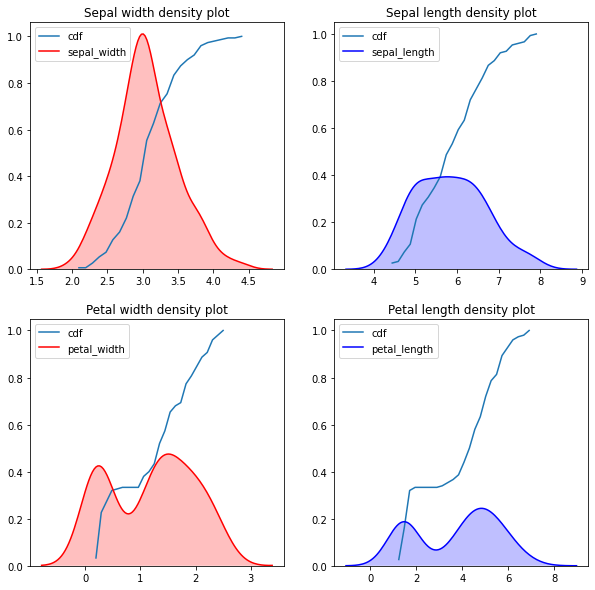

In [58]:
# library and dataset 
df = sns.load_dataset('iris')

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
counts, bin_edges = np.histogram(df['sepal_width'], bins=25, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title('Sepal width density plot')
sns.kdeplot(data=df['sepal_width'],shade=True,color='r')


plt.subplot(2,2,2)
counts, bin_edges = np.histogram(df['sepal_length'], bins=25, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title('Sepal length density plot')
sns.kdeplot(data=df['sepal_length'],shade=True,color='b')


plt.subplot(2,2,3)
counts, bin_edges = np.histogram(df['petal_width'], bins=25, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title('Petal width density plot')
sns.kdeplot(data=df['petal_width'],shade=True,color='r')


plt.subplot(2,2,4)
counts, bin_edges = np.histogram(df['petal_length'], bins=25, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title('Petal length density plot')
sns.kdeplot(data=df['petal_length'],shade=True,color='b')

### Using violin plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots of ```species``` versus ```sepal_length```.
* Assign each group a color like 

    * versicolor - green, 
    * setosa - blue,   
    * virginica - m

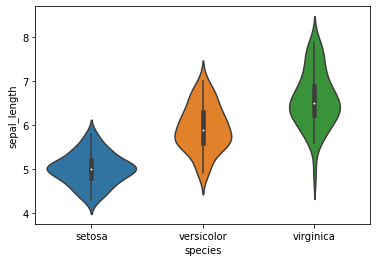

In [9]:
# Draw the normal violin plots 
sns.violinplot(y='sepal_length',x='species',data=df)

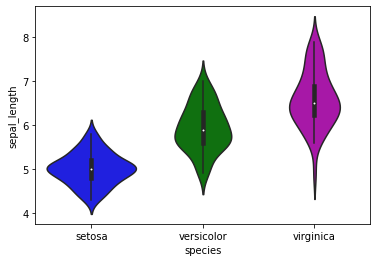

In [59]:
# Change the color of each group
flower_col = {"versicolor": "g", "setosa": "b", "virginica":"m"} 
sns.violinplot(y='sepal_length',x='species',data=df,palette=flower_col)